In [31]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.integrate import quad

colors = ["#006400", "#8b0000", "#008080", "#ff8c00", "#00008b", "#8a9a5b", "#e9967a", "#708090", "#6b8e23",
           "#cc5500", "#8b4513", "#4682b4", "#E69F00", "#56B4E9", "#F0E442", "#0072B2", "#CC79A7", "#009E73", "#000000", "#654321"]
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
#from scipy.special import gamma as gamma_func
from iminuit import Minuit
from scipy import stats
#from matplotlib.patches import Circle

# Exercise 1

In [5]:
data1 = np.genfromtxt("LLH_Ratio_2_data.txt")[:, 0]
data2 = np.genfromtxt("LLH_Ratio_2a_data.txt")[:, 0]

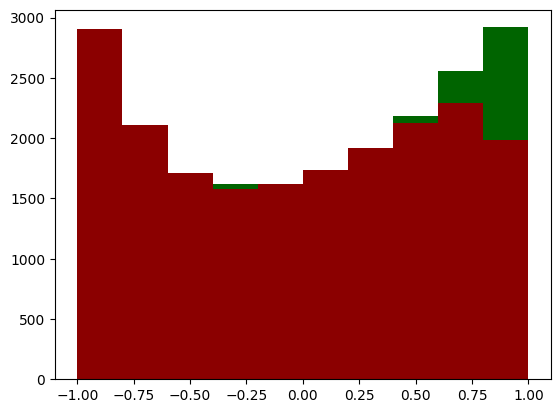

In [7]:
plt.hist(data1);
plt.hist(data2);

In [8]:
def null_hypothesis(x, rho, omega):
    return 1 + rho * x + omega * x**2

def normalized_null_hypothesis(x, rho, omega):
    norm_const, _ = quad(null_hypothesis, -1, 1, args=(rho, omega))
    return null_hypothesis(x, rho, omega) / norm_const


def alt_hypothesis(x, rho, omega, gamma):
    return 1 + rho * x + omega * x**2 - gamma * x**5

def normalized_alt_hypothesis(x, rho, omega, gamma):
    norm_const, _ = quad(alt_hypothesis, -1, 1, args=(rho, omega, gamma))
    return alt_hypothesis(x, rho, omega, gamma) / norm_const

In [14]:
def ln_likelihood_minimize_null(data, rho, omega):
    func = lambda x: normalized_null_hypothesis(x, rho, omega)
    return -np.sum(np.log(func(data)), axis=0)


def ln_likelihood_minimize_alt(data, rho, omega, gamma):
    func = lambda x: normalized_alt_hypothesis(x, rho, omega, gamma)
    return -np.sum(np.log(func(data)), axis=0)

minimizer_null_data1 = Minuit(lambda rho, omega: ln_likelihood_minimize_null(data1, rho, omega), rho=0.5, omega=0.5)
minimizer_null_data1.migrad()
minimizer_null_data2 = Minuit(lambda rho, omega: ln_likelihood_minimize_null(data2, rho, omega), rho=0.5, omega=0.5)
minimizer_null_data2.migrad()
minimizer_alt_data1 = Minuit(lambda rho, omega, gamma: ln_likelihood_minimize_alt(data1, rho, omega, gamma), rho=0.5, omega=0.5, gamma=0.5)
minimizer_alt_data1.migrad()
minimizer_alt_data2 = Minuit(lambda rho, omega, gamma: ln_likelihood_minimize_alt(data2, rho, omega, gamma), rho=0.5, omega=0.5, gamma=0.5)
minimizer_alt_data2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.35e+04                   │              Nfcn = 75               │
│ EDM = 1.92e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ rho   │   0.32    │   0.04    │            │            │         │         │       │
│ 1 │ omega │   0.59    │   0.05    │            │            │         │         │       │
│ 2 │ gamma │   0.92    │   0.08    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────┐
│       │     rho   omega   gamma │
├───────┼─────────────────────────┤
│   rho │ 0.00133  0.0003  0.0022 │
│ omega │  0.0003 0.00244  0.0010 │
│ gamma │  0.0022  0.0010 0.00564 │
└───────┴─────────────────────────┘

In [18]:
rho_null_data1, omega_null_data1 = minimizer_null_data1.values
rho_null_data2, omega_null_data2 = minimizer_null_data2.values
rho_alt_data1, omega_alt_data1, gamma_alt_data1 = minimizer_alt_data1.values
rho_alt_data2, omega_alt_data2, gamma_alt_data2 = minimizer_alt_data2.values

In [45]:
LLH_null_data1 = ln_likelihood_minimize_null(data1, rho_null_data1, omega_null_data1)
LLH_null_data2 = ln_likelihood_minimize_null(data2, rho_null_data2, omega_null_data2)
LLH_alt_data1 = ln_likelihood_minimize_alt(data1, rho_alt_data1, omega_alt_data1, gamma_alt_data1)
LLH_alt_data2 = ln_likelihood_minimize_alt(data2, rho_alt_data2, omega_alt_data2, gamma_alt_data2)

In [44]:
print("Data 1:")
print("-LLH h0:", -LLH_null_data1)
print("-LLH hA:", -LLH_alt_data1)
chi2_stat_data1 = -2*(LLH_null_data1 - LLH_alt_data1)
print("-2(LLH_h0-LLH_hA):", chi2_stat_data1) # This is the chi2_k=1, where then the p-value is the inverse survival function
print("p-value:", stats.chi2.sf(abs(chi2_stat_data1), 1)) # sf or 1 - isf
print()
print("Data 2:")
print("-LLH h0:", -LLH_null_data2)
print("-LLH hA:", -LLH_alt_data2)
chi2_stat_data2 = -2*(LLH_null_data2 - LLH_alt_data2)
print("-2(LLH_h0-LLH_hA):", chi2_stat_data2) # This is the chi2_k=1, where then the p-value is the inverse survival function
print("p-value:", stats.chi2.sf(abs(chi2_stat_data2), 1))


Data 1:
-LLH h0: -13432.139550369662
-LLH hA: -13431.405470964015
-2(LLH_h0-LLH_hA): -1.4681588112944155
p-value: 0.2256364166072721

Data 2:
-LLH h0: -13651.005538365564
-LLH hA: -13495.017489946045
-2(LLH_h0-LLH_hA): -311.9760968390365
p-value: 8.104936872746848e-70
